MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


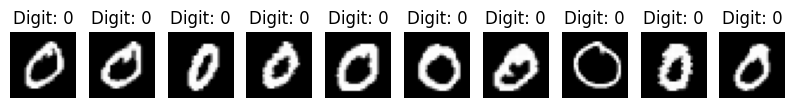

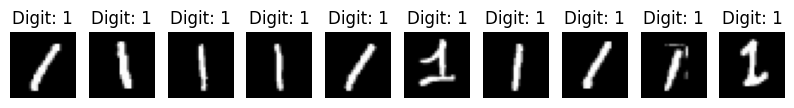

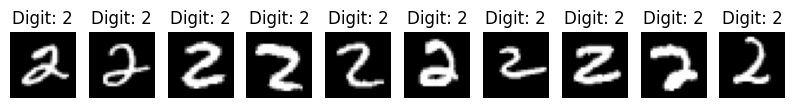

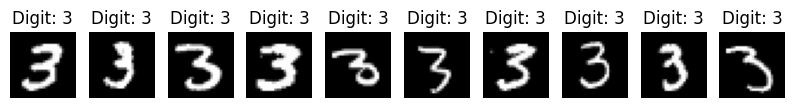

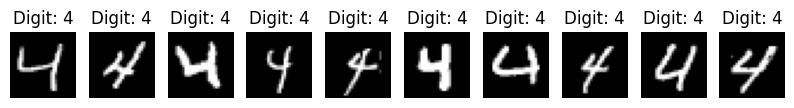

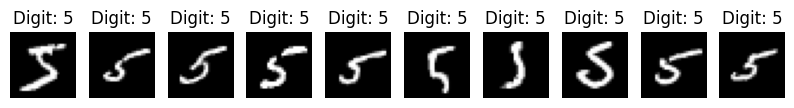

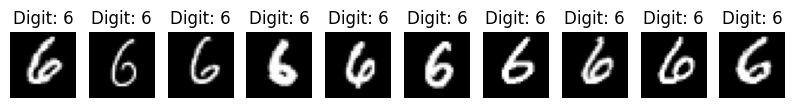

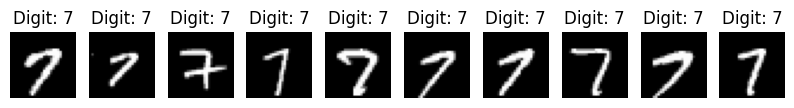

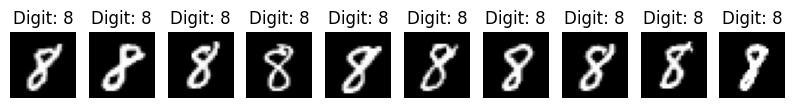

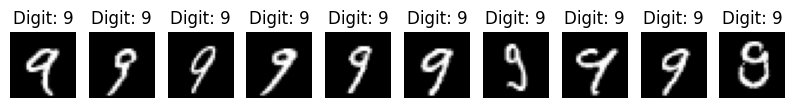

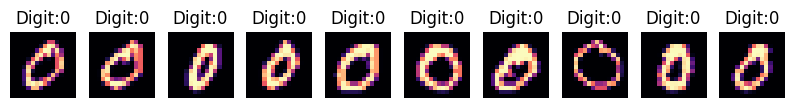

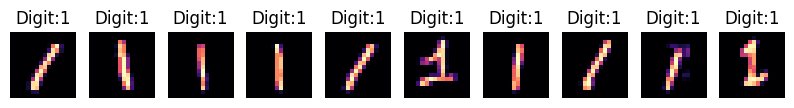

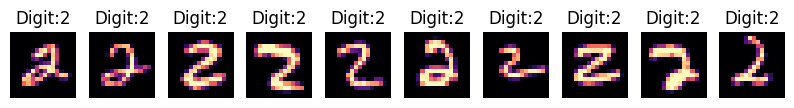

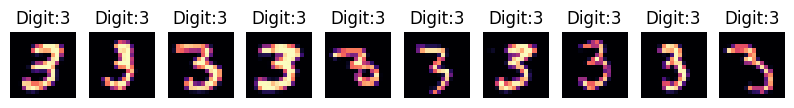

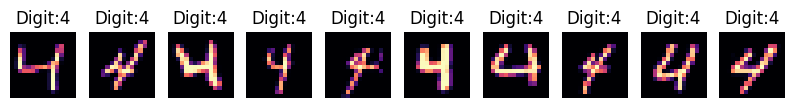

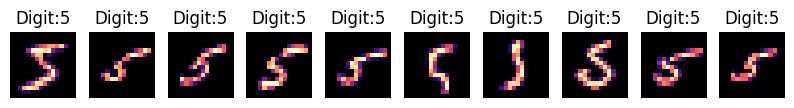

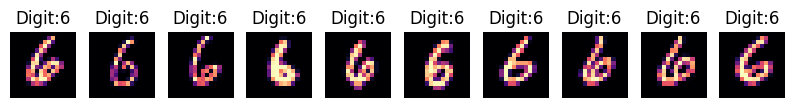

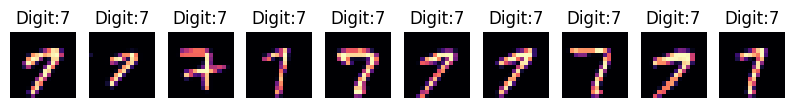

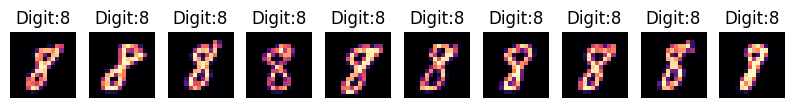

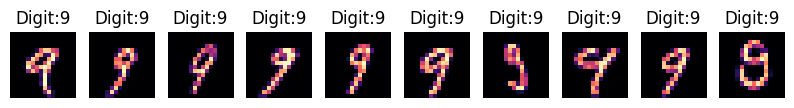

Digit zero [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit one [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit two [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit three [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit four [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit fifth [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]

C:\Users\Asus\AppData\Local\Temp\ipykernel_6628\3120706411.py:241: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  input_state_vectors = torch.tensor(input_state_vectors, dtype=torch.float32)


In [1]:
# Quantum Amplitude Encoding
import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)
    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"C:\Users\Asus\Downloads\archive (8)\train-images.idx3-ubyte"
train_labels_file = r"C:\Users\Asus\Downloads\archive (8)\train-labels.idx1-ubyte"

mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits
N = 16
from skimage.transform import resize

def resize_images(images, new_size = (N,N)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (N,N)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)

# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

# Quantum Amplitude Encoding of MNIST Dataset

N = 16

def binary_basis_encoding(image):
    """
    Convert normalized grayscale image (N x N) to 2D binary basis vector
    For each pixel: pixel > 0.5 → [0,1], else [1,0]
    Final shape: (2*N*N,)
    """
    encoded = []
    for pixel in image.flatten():
        if pixel > 0.5:
            encoded.extend([0.0, 1.0])  # |1⟩
        else:
            encoded.extend([1.0, 0.0])  # |0⟩
    return np.array(encoded, dtype=np.float32)


Digit_zero_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_zero[:5000]]
Digit_one_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_one[:5000]]
Digit_two_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_two[:5000]]
Digit_three_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_three[:5000]]
Digit_four_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_four[:5000]]
Digit_five_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_fifth[:5000]]
Digit_sixth_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_sixth[:5000]]
Digit_seventh_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_seventh[:5000]]
Digit_eigth_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_eigth[:5000]]
Digit_nineth_ = [binary_basis_encoding(img.reshape(N, N)) for img in Digit_nineth[:5000]]

# Combine all vectors
input_state_vectors = []
input_state_vectors.extend(Digit_zero_)
input_state_vectors.extend(Digit_one_)
input_state_vectors.extend(Digit_two_)
input_state_vectors.extend(Digit_three_)
input_state_vectors.extend(Digit_four_)
input_state_vectors.extend(Digit_five_)
input_state_vectors.extend(Digit_sixth_)
input_state_vectors.extend(Digit_seventh_)
input_state_vectors.extend(Digit_eigth_)
input_state_vectors.extend(Digit_nineth_)

input_state_vectors = torch.tensor(input_state_vectors, dtype=torch.float32)







# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"C:\Users\Asus\Downloads\archive (8)\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"C:\Users\Asus\Downloads\archive (8)\t10k-labels.idx1-ubyte")

# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((N, N))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

input_state_test_vectors = [binary_basis_encoding(img.reshape(N, N)) for img in test_images]
input_state_test_vectors = torch.tensor(input_state_test_vectors, dtype=torch.float32)






C:\Users\Asus\AppData\Local\Temp\ipykernel_6628\1733826910.py:351: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.float32),
C:\Users\Asus\AppData\Local\Temp\ipykernel_6628\1733826910.py:353: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.float32),



TRAINING CASE 1
Training Case 1 on device: cpu
Epoch 1/100 - Case 1 Total: 19.784088 (Recon: 9.892044, Class: 0.000000) - Train Acc: 2.83% - Test Acc: 2.12%
Epoch 2/100 - Case 1 Total: 19.295404 (Recon: 9.647702, Class: 0.000000) - Train Acc: 8.97% - Test Acc: 10.37%
Epoch 3/100 - Case 1 Total: 19.009285 (Recon: 9.504642, Class: 0.000000) - Train Acc: 30.03% - Test Acc: 32.90%
Epoch 4/100 - Case 1 Total: 16.878960 (Recon: 8.439480, Class: 0.000000) - Train Acc: 45.20% - Test Acc: 47.51%
Epoch 5/100 - Case 1 Total: 16.564680 (Recon: 8.282340, Class: 0.000000) - Train Acc: 32.13% - Test Acc: 33.53%
Epoch 6/100 - Case 1 Total: 17.186346 (Recon: 8.593173, Class: 0.000000) - Train Acc: 30.90% - Test Acc: 32.09%
Epoch 7/100 - Case 1 Total: 16.250374 (Recon: 8.125187, Class: 0.000000) - Train Acc: 35.73% - Test Acc: 36.71%
Epoch 8/100 - Case 1 Total: 16.787750 (Recon: 8.393875, Class: 0.000000) - Train Acc: 44.31% - Test Acc: 46.09%
Epoch 9/100 - Case 1 Total: 16.567415 (Recon: 8.283708, Cla

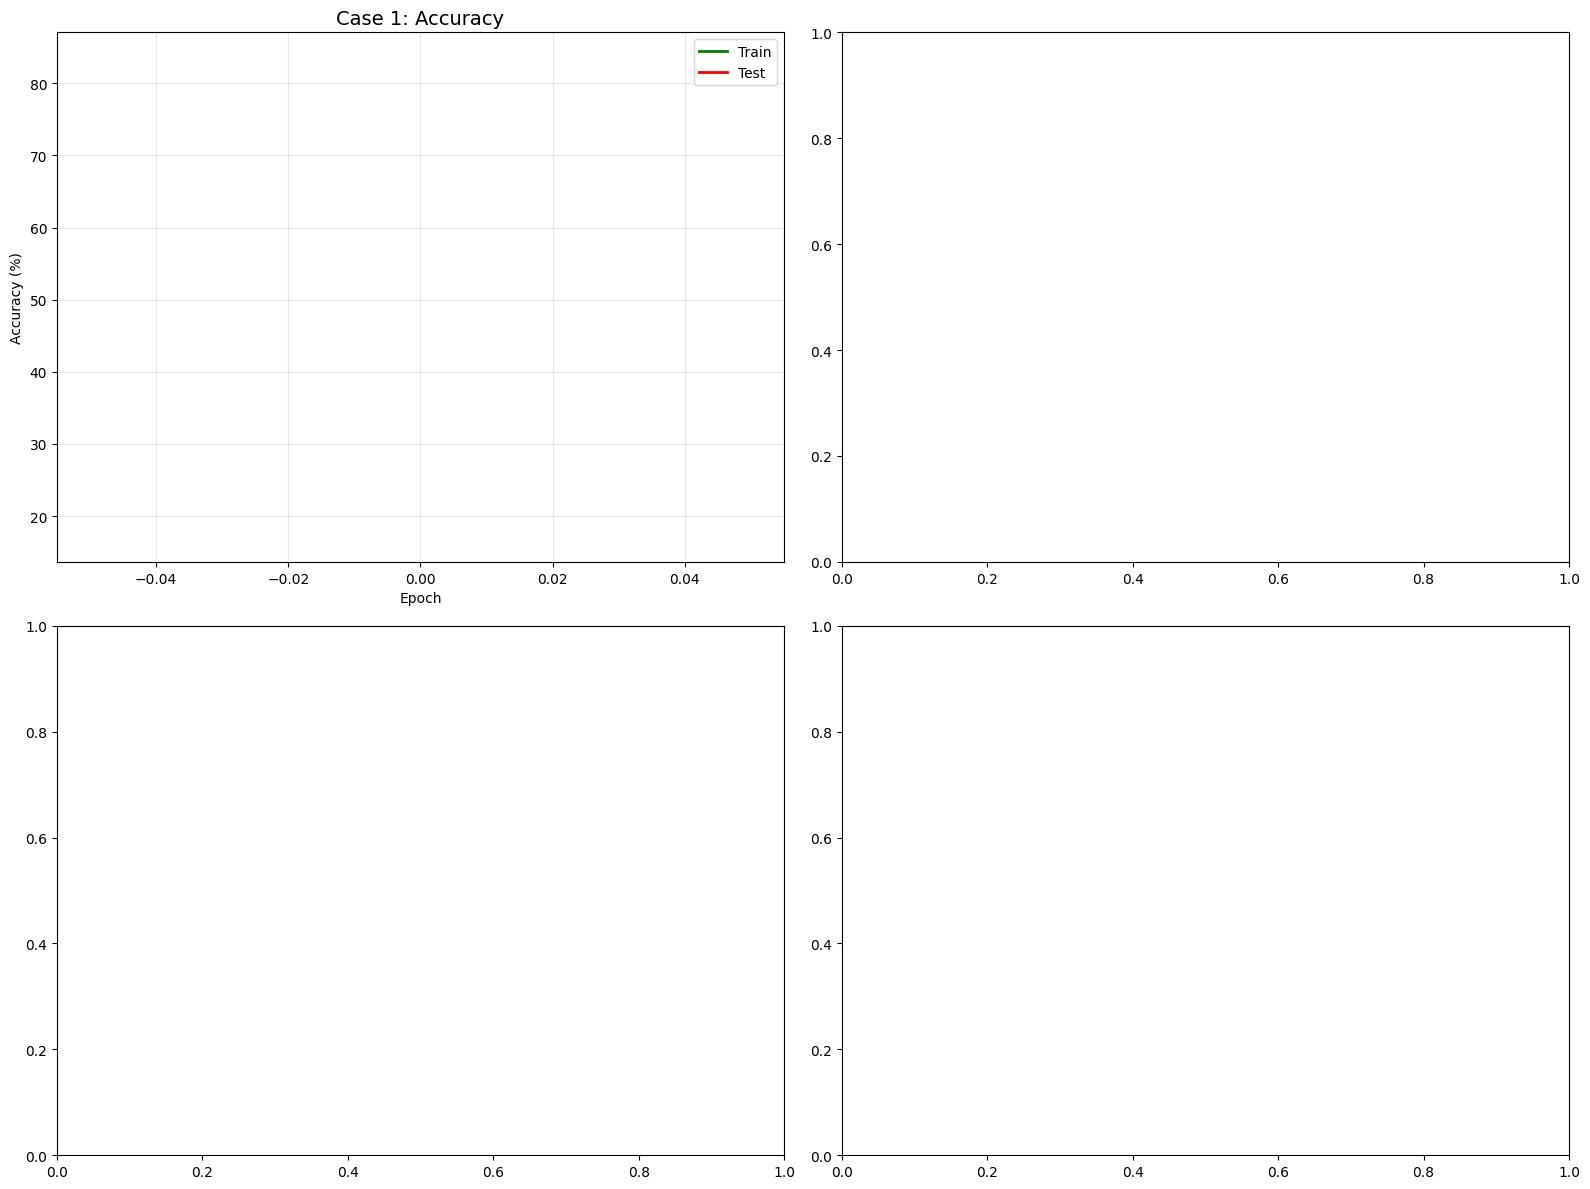

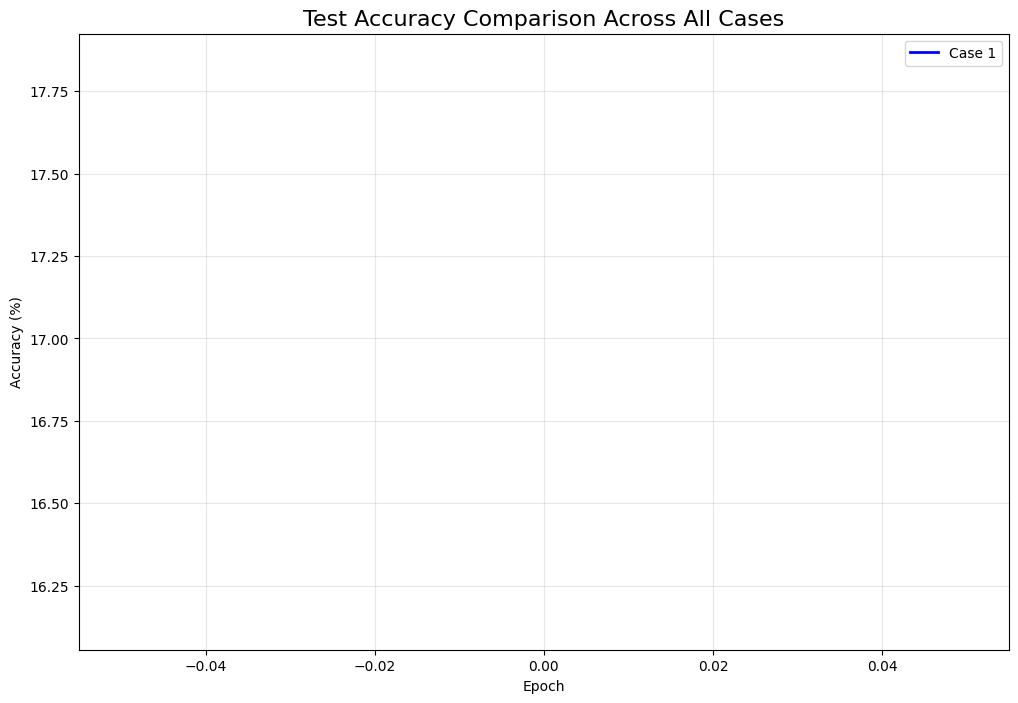


FINAL TRAINING SUMMARY
Case 1 - Final Train Accuracy: 83.73%
[ERROR] Unexpected exception: 'best_acc'


Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_6628\1733826910.py", line 639, in main
    print(f"Case {case_num} - Best Test Accuracy: {results['best_acc']:.2f}%")
                                                   ~~~~~~~^^^^^^^^^^^^
KeyError: 'best_acc'


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np
import os
import idx2numpy
from PIL import Image
import matplotlib.pyplot as plt



class QuantumUnitaryNetwork(nn.Module):
    def __init__(self, input_dim=64, hidden_dim=64, degrees=10, num_classes=10, case=1, encoding_type="binary"):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.degrees = degrees
        self.num_classes = num_classes
        self.case = case
        self.encoding_type = encoding_type  # NEW
        self.layer_norm = nn.LayerNorm(self.hidden_dim)


        
        self.forward_unitaries = nn.ModuleList([
        nn.Linear(hidden_dim, hidden_dim, bias=False, dtype=torch.float32) for _ in range(degrees)
])
        self.reverse_unitaries = nn.ModuleList([
        nn.Linear(hidden_dim, hidden_dim, bias=False, dtype=torch.float32) for _ in range(degrees)
])

        
        # if case in [1, 3]:

        #     self.class_embeddings = self._create_target_vectors
            
        # elif case in [2, 4]:

        #     self.register_buffer('target_vectors', self._create_target_vectors())
        #     self.layer_norm = nn.LayerNorm(hidden_dim)
            
        # self._initialize_unitary_matrices()
    
    def _create_target_vectors(self):
        target_states_combined = torch.zeros((50000, self.hidden_dim), dtype=torch.float32)

        idxs = [i * (self.hidden_dim // 10) for i in range(10)]  # distribute across hidden_dim
        for c in range(10):
            target_states_combined[c*5000:(c+1)*5000, idxs[c]] = 1.0

        return F.normalize(target_states_combined, p=2, dim=1)

            
    # def _initialize_unitary_matrices(self):
    #     with torch.no_grad():

    #         for unitary in self.forward_unitaries:
    #             random_matrix = torch.randn(self.hidden_dim, self.hidden_dim)
    #             Q, R = torch.linalg.qr(random_matrix)

    #             det = torch.det(Q)
    #             if det < 0:
    #                 Q[:, -1] *= -1
    #             unitary.weight.copy_(Q)
                
    #         for unitary in self.reverse_unitaries:
    #             random_matrix = torch.randn(self.hidden_dim, self.hidden_dim)
    #             Q, R = torch.linalg.qr(random_matrix)
    #             det = torch.det(Q)
    #             if det < 0:
    #                 Q[:, -1] *= -1
    #             unitary.weight.copy_(Q)

    # def enforce_unitary_constraints(self):
    #     with torch.no_grad():

    #         # Forward unitaries
    #         for unitary in self.forward_unitaries:
    #             Q, _ = torch.linalg.qr(unitary.weight.data)
    #             if torch.det(Q) < 0:
    #                 Q[:, -1] *= -1
    #             unitary.weight.copy_(Q)

    #         # Reverse unitaries
    #         for unitary in self.reverse_unitaries:
    #             Q, _ = torch.linalg.qr(unitary.weight.data)
    #             if torch.det(Q) < 0:
    #                 Q[:, -1] *= -1
    #             unitary.weight.copy_(Q)

    @staticmethod
    def _make_unitary(w):
        q, r = torch.linalg.qr(w)
        ph   = torch.sign(torch.diag(r))
        return q * ph
    # @staticmethod
    # def _make_unitary(w):
    #     u, s,v = torch.linalg.svd(w)
    #     return u@v
    # @staticmethod
    # def _make_unitary(w):
    #     w_new = (w + w.conj().T)/2
    #     s = torch.matrix_exp((-1j)*w_new)
    #     return s.real
    # @staticmethod
    # def _make_unitary(w): # Nonunitary Matrices
    #     return w

    def _verify_unitary_constraints(self):
        max_violation = 0.0
        with torch.no_grad():
            all_unitaries = list(self.forward_unitaries) + list(self.reverse_unitaries)
            
            for unitary in all_unitaries:
                U = unitary.weight.data
                I = torch.eye(U.size(0), device=U.device, dtype=U.dtype)
                UUT_minus_I = U @ U.T - I
                violation = torch.linalg.norm(UUT_minus_I).item()
                max_violation = max(max_violation, violation)
                
        return max_violation < 1e-10

    def forward(self, x):

        # x = F.normalize(x, p=2, dim=1, eps=1e-8)
        
        if self.case == 1:
            return self._case1_forward(x)
        
        # elif self.case == 2:
        #     return self._case2_forward(x)
        # elif self.case == 3:
        #     return self._case3_forward(x)
        # elif self.case == 4:
        #     return self._case4_forward(x)
        # else:
        #     raise ValueError("Invalid case value. Must be 1, 2, 3, or 4.")

    def _case1_forward(self, x):

        target_vectors = self._create_target_vectors().to(x.device)

        Uf1 = self._make_unitary(self.forward_unitaries[0].weight)
        Uf2 = self._make_unitary(self.forward_unitaries[1].weight)
        Uf3 = self._make_unitary(self.forward_unitaries[2].weight)
        UR1 = self._make_unitary(self.reverse_unitaries[2].weight)
        UR2 = self._make_unitary(self.reverse_unitaries[1].weight)
        UR3 = self._make_unitary(self.reverse_unitaries[0].weight)
        F1 = x@Uf1
        R1 = target_vectors@UR1
        F2 = F1@Uf2
        R2 = R1@UR2
        F3 = F2@Uf3
        R3 = R2@UR3

        Final = x@Uf1@Uf2@Uf3@UR3.conj().T@UR2.conj().T@UR1.conj().T

        return F1,F2,F3,R1,R2,R3,Final

    # def _case2_forward(self, x , target_states):

        
    #     transformed = x
    #     for forward_unitary in self.forward_unitaries:
    #         transformed = forward_unitary(transformed)
    #         transformed = F.normalize(transformed, p=2, dim=1, eps=1e-8)

    #     for reverse_unitary in reversed(self.reverse_unitaries):
    #         transformed = transformed @ reverse_unitary.weight.T
    #         transformed = F.normalize(transformed, p=2, dim=1, eps=1e-8)

    #     similarities = torch.mm(transformed, self.target_vectors.T)
    #     return similarities

    # def _case3_forward(self, x):

        
        
   
    #     forward_states = [x]
    #     reverse_states = []
        

    #     forward_state = x
    #     for forward_unitary in self.forward_unitaries:
    #         forward_state = forward_unitary(forward_state)
    #         forward_state = F.normalize(forward_state, p=2, dim=1, eps=1e-8)
    #         forward_states.append(forward_state)
        

    #     reverse_state = forward_state
    #     reverse_states.append(reverse_state) 
        
    #     for reverse_unitary in reversed(self.reverse_unitaries):
    #         reverse_state = reverse_state @ reverse_unitary.weight.T
    #         reverse_state = F.normalize(reverse_state, p=2, dim=1, eps=1e-8)
    #         reverse_states.append(reverse_state)
        

    #     class_similarities = torch.mm(reverse_state, F.normalize(self.class_embeddings, p=2, dim=1).T)
        
    #     return forward_state, reverse_state, class_similarities, forward_states, reverse_states

    # def _case4_forward(self, x):
        

    #     forward_states = [x]  
    #     reverse_states = []
        
    #     transformed = self.layer_norm(x)

    #     for forward_unitary in self.forward_unitaries:
    #         transformed = forward_unitary(transformed)
    #         transformed = F.normalize(transformed, p=2, dim=1, eps=1e-8)
    #         forward_states.append(transformed)
        
    
    #     reverse_states.append(transformed)
        
    #     for reverse_unitary in reversed(self.reverse_unitaries):
    #         transformed = transformed @ reverse_unitary.weight.T
    #         transformed = F.normalize(transformed, p=2, dim=1, eps=1e-8)
    #         reverse_states.append(transformed)

    #     similarities = torch.mm(transformed, self.target_vectors.T)
    #     return similarities, forward_states, reverse_states


def case1_loss(F1, F2, F3, R1, R2,R3,Final,target,x):
    """Case 1 loss with multiple objectives"""

    reconstruction_loss_F1_target = F.mse_loss(F1, target)
    reconstruction_loss_R1_x = F.mse_loss(R1, x)
    reconstruction_loss_F2_R1 = F.mse_loss(F2, R1)
    reconstruction_loss_R2_F1 = F.mse_loss(R2, F1)
    reconstruction_loss_F3_R2 = F.mse_loss(F3, R2)
    reconstruction_loss_R3_F2 = F.mse_loss(R3, F2)
    reconstruction_loss_Fina1_target = F.cross_entropy(Final, target)
    reconstruction_loss_R3_F3 = F.mse_loss(R3, F3)

    
    total_loss = reconstruction_loss_F1_target + reconstruction_loss_R1_x + reconstruction_loss_F2_R1 + reconstruction_loss_R2_F1 \
                + reconstruction_loss_F3_R2 + reconstruction_loss_R3_F2 + reconstruction_loss_R3_F3 + reconstruction_loss_Fina1_target
    
    return total_loss

 
# def case2_loss(predictions, targets):

#     return F.cross_entropy(predictions, targets)


# def case3_loss(forward_state, reverse_state, class_similarities, labels, 
#                forward_states, reverse_states, alpha=0.5, beta=0.2):


#     reconstruction_loss = F.mse_loss(forward_state, reverse_state)
#     classification_loss = F.cross_entropy(class_similarities, labels)
    

#     layer_constraint_loss = 0.0
#     num_layers = len(forward_states) - 1  
    
#     if num_layers > 0:

        
#         for i in range(1, min(len(forward_states), len(reverse_states))):

#             reverse_idx = i
#             forward_idx = len(forward_states) - 1 - i
            
#             if forward_idx >= 0 and reverse_idx < len(reverse_states):
#                 layer_loss = F.mse_loss(reverse_states[reverse_idx], forward_states[forward_idx])
#                 layer_constraint_loss += layer_loss

#     total_loss = (alpha * reconstruction_loss + 
#                   (1 - alpha - beta) * classification_loss + 
#                   beta * layer_constraint_loss)
    
#     return total_loss, reconstruction_loss, classification_loss, layer_constraint_loss


# def case4_loss(predictions, targets, forward_states, reverse_states, beta=0.2):

 
#     classification_loss = F.cross_entropy(predictions, targets)
    
 
#     layer_constraint_loss = 0.0
#     num_layers = len(forward_states) - 1 
    
#     if num_layers > 0:

#         for i in range(1, min(len(forward_states), len(reverse_states))):
#             reverse_idx = i
#             forward_idx = len(forward_states) - 1 - i
            
#             if forward_idx >= 0 and reverse_idx < len(reverse_states):
#                 layer_loss = F.mse_loss(reverse_states[reverse_idx], forward_states[forward_idx])
#                 layer_constraint_loss += layer_loss
    
#     total_loss = (1 - beta) * classification_loss + beta * layer_constraint_loss
    
#     return total_loss, classification_loss, layer_constraint_loss


# def load_local_mnist(base_path, batch_size=64):
#     train_images_path = os.path.join(base_path, "train-images.idx3-ubyte")
#     train_labels_path = os.path.join(base_path, "train-labels.idx1-ubyte")
#     test_images_path = os.path.join(base_path, "t10k-images.idx3-ubyte")
#     test_labels_path = os.path.join(base_path, "t10k-labels.idx1-ubyte")

#     required_files = [train_images_path, train_labels_path, test_images_path, test_labels_path]
#     for file_path in required_files:
#         if not os.path.exists(file_path):
#             raise FileNotFoundError(f"MNIST file not found: {file_path}")

#     train_images = idx2numpy.convert_from_file(train_images_path)
#     train_labels = idx2numpy.convert_from_file(train_labels_path)
#     test_images = idx2numpy.convert_from_file(test_images_path)
#     test_labels = idx2numpy.convert_from_file(test_labels_path)

#     def preprocess_images(images, target_size=28):
#         processed = []
#         for img in images:
#             img_resized = np.array(Image.fromarray(img).resize((target_size, target_size)))
#             img_flat = img_resized.flatten().astype(np.float32) / 255.0
#             img_flat = (img_flat - 0.5) / 0.5  
#             processed.append(img_flat)
#         return np.array(processed)

#     train_images_processed = preprocess_images(train_images)
#     test_images_processed = preprocess_images(test_images)

idxs = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63]
hidden_dim = 512  # match with model config
idxs = [i * (hidden_dim // 10) for i in range(10)]

T_train = np.zeros((50000, hidden_dim), dtype=np.float32)
for c in range(10):
    T_train[c*5000:(c+1)*5000, idxs[c]] = 1.0

T_test = np.zeros((10000, hidden_dim), dtype=np.float32)
for i, lab in enumerate(labelss):
    T_test[i, idxs[lab]] = 1.0

for i, lab in enumerate(labelss):
    T_test[i, idxs[lab]] = 1.0
train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.float32),
                             torch.tensor(T_train, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(input_state_test_vectors,  dtype=torch.float32),
                             torch.tensor(T_test,  dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=50000, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=False, num_workers=0)



def evaluate_model(model, data_loader, device):
    model.eval()

    total = 0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            
            if model.case == 1:
                F1,F2,F3,R1,R2,R3,Final = model(data)
                classes = torch.argmax(Final,dim=1)//7
                target_classes = torch.argmax(target,dim=1)//7
                correct = 0
                for i in range(len(classes)):
                    if classes[i] == target_classes[i]:
                        correct+=1
            # elif model.case == 2:
            #     output = model(data)
            #     _, predicted = torch.max(output.data, 1)
            #     correct += (predicted == target).sum().item()
            # elif model.case == 3:

            #     forward_state, reverse_state, class_similarities, _, _ = model(data)
            #     _, predicted = torch.max(class_similarities, 1)
            #     correct += (predicted == target).sum().item()
            # elif model.case == 4:

            #     output, _, _ = model(data)
            #     _, predicted = torch.max(output.data, 1)
            #     correct += (predicted == target).sum().item()
            
            # total += target.size(0)
    
                accuracy = 100 * correct / 50000
            return accuracy


def train_model(model, train_loader, test_loader=None, num_epochs=100, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Training Case {model.case} on device: {device}")

    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

    train_losses = []
    train_accuracies = []
    test_accuracies = []


    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        total_reconstruction_loss = 0.0
        total_classification_loss = 0.0
        total_layer_constraint_loss = 0.0
        processed_batches = 0
        train_accuracy = 0
        test_accuracy = 0

        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            
            if model.case == 1:
                F1, F2, F3, R1, R2,R3,Final = model(data)
                total_loss = case1_loss(
                    F1, F2, F3, R1, R2,R3,Final,target,data
                )
                total_reconstruction_loss += total_loss.item()
    
            # elif model.case == 2:
            #     output = model(data)
            #     loss = case2_loss(output, target)
                
            # elif model.case == 3:
            #     forward_state, reverse_state, class_similarities, forward_states, reverse_states = model(data)
            #     loss, recon_loss, class_loss, layer_loss = case3_loss(
            #         forward_state, reverse_state, class_similarities, target,
            #         forward_states, reverse_states
            #     )
            #     total_reconstruction_loss += recon_loss.item()
            #     total_classification_loss += class_loss.item()
            #     total_layer_constraint_loss += layer_loss.item()
                
            # elif model.case == 4:
            #     output, forward_states, reverse_states = model(data)
            #     loss, class_loss, layer_loss = case4_loss(
            #         output, target, forward_states, reverse_states
            #     )
            #     total_classification_loss += class_loss.item()
            #     total_layer_constraint_loss += layer_loss.item()
            
            # if torch.isnan(loss):
            #     continue
                
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            # model.enforce_unitary_constraints()
            total_loss += total_loss.item()
            processed_batches += 1

        scheduler.step()
        
        if processed_batches > 0:
            avg_loss = total_loss / processed_batches
            train_losses.append(avg_loss)

        train_accuracy = evaluate_model(model, train_loader, device)
        
        if test_loader is not None:
            test_accuracy = evaluate_model(model, test_loader, device)


        if model.case == 1 :
            avg_recon_loss = total_reconstruction_loss / processed_batches
            avg_class_loss = total_classification_loss / processed_batches
            print(f"Epoch {epoch+1}/{num_epochs} - Case 1 Total: {avg_loss:.6f} "
                  f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}) "
                  f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy*5:.2f}%")
        # elif model.case == 2:
        #     print(f"Epoch {epoch+1}/{num_epochs} - Case 2 Loss: {avg_loss:.6f} "
        #           f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        # elif model.case == 3 and processed_batches > 0:
        #     avg_recon_loss = total_reconstruction_loss / processed_batches
        #     avg_class_loss = total_classification_loss / processed_batches
        #     avg_layer_loss = total_layer_constraint_loss / processed_batches
        #     print(f"Epoch {epoch+1}/{num_epochs} - Case 3 Total: {avg_loss:.6f} "
        #           f"(Recon: {avg_recon_loss:.6f}, Class: {avg_class_loss:.6f}, Layer: {avg_layer_loss:.6f}) "
        #           f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")
        # elif model.case == 4 and processed_batches > 0:
        #     avg_class_loss = total_classification_loss / processed_batches
        #     avg_layer_loss = total_layer_constraint_loss / processed_batches
        #     print(f"Epoch {epoch+1}/{num_epochs} - Case 4 Total: {avg_loss:.6f} "
        #           f"(Class: {avg_class_loss:.6f}, Layer: {avg_layer_loss:.6f}) "
        #           f"- Train Acc: {train_accuracy:.2f}% - Test Acc: {test_accuracy:.2f}%")

    # Verify unitary constraints at the end
    constraints_satisfied = model._verify_unitary_constraints()
    print(f"Unitary constraints satisfied: {constraints_satisfied}")
    
    return train_losses, train_accuracy, test_accuracy


# def evaluate_case1_composite_accuracy(model, data_loader, device):
#     model.eval()
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         U_total = model.input_proj.weight.clone()
#         for fwd in model.forward_unitaries:
#             U_total = fwd.weight @ U_total
#         for rev in reversed(model.reverse_unitaries):
#             U_total = rev.weight.T @ U_total
        
#         # Normalize class embeddings
#         class_embeddings = F.normalize(model.class_embeddings, dim=1)

#         for data, labels in data_loader:
#             data, labels = data.to(device), labels.to(device)
#             data = F.normalize(data, dim=1) 
            
#             transformed = F.normalize((U_total @ data.T).T, dim=1)

#             sims = transformed @ class_embeddings.T
#             preds = torch.argmax(sims, dim=1)
#             correct += (preds == labels).sum().item()
#             total += labels.size(0)

#     acc = 100.0 * correct / total
#     I = torch.eye(U_total.size(0), device=U_total.device)
#     unitarity_error = torch.norm(U_total @ U_total.T - I)
#     print(f"Composite U_total unitarity error: {unitarity_error.item():.6e}")

#     return acc


def main():
    """Main training pipeline"""
    
    input_dim = 512
    hidden_dim = 512
    degrees = 10
    num_classes = 10
    batch_size = 128
    num_epochs = 100 
    learning_rate = 0.01

    try:


        all_results = {}


        for case_num in [1]:
            print("\n" + "="*60)
            print(f"TRAINING CASE {case_num}")
            print("="*60)
            
            model = QuantumUnitaryNetwork(
                input_dim=input_dim,
                hidden_dim=hidden_dim,
                degrees=degrees,
                num_classes=num_classes,
                case=case_num
            )


            # if case_num in [2, 4] and 1 in all_results:
            #     model_case1 = all_results[1]['model']
            #     with torch.no_grad():
            #         model.input_proj.weight.copy_(model_case1.input_proj.weight)
            #         for i in range(degrees):
            #             model.forward_unitaries[i].weight.copy_(model_case1.forward_unitaries[i].weight)
            #             model.reverse_unitaries[i].weight.copy_(model_case1.reverse_unitaries[i].weight)
            #     print(f"Transferred weights from Case 1 to Case {case_num}")

            train_losses, train_acc, test_acc= train_model(
                model, train_loader, test_loader, num_epochs, learning_rate
            )

            all_results[case_num] = {
                'model': model,
                'train_losses': train_losses,
                'train_acc': train_acc,
                'test_acc': test_acc
            }


            # if case_num in [1, 3]:
            #     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            #     composite_acc = evaluate_case1_composite_accuracy(model, test_loader, device)
            #     print(f"Case {case_num} - Accuracy via full composite unitary chain: {composite_acc:.2f}%")

        # Plotting results
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()

        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                axes[i].plot(results['train_acc'], 'g-', linewidth=2, label='Train')
                axes[i].plot(results['test_acc'], 'r-', linewidth=2, label='Test')
                axes[i].set_title(f'Case {case_num}: Accuracy', fontsize=14)
                axes[i].set_xlabel('Epoch')
                axes[i].set_ylabel('Accuracy (%)')
                axes[i].legend()
                axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Comparison plot
        plt.figure(figsize=(12, 8))
        colors = ['blue', 'red', 'green', 'orange']
        for i, case_num in enumerate([1, 2, 3, 4]):
            if case_num in all_results:
                results = all_results[case_num]
                plt.plot(results['test_acc'], color=colors[i], linewidth=2, label=f'Case {case_num}')

        plt.title('Test Accuracy Comparison Across All Cases', fontsize=16)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        print("\n" + "="*60)
        print("FINAL TRAINING SUMMARY")
        print("="*60)
        for case_num in [1, 2, 3, 4]:
            if case_num in all_results:
                results = all_results[case_num]
                print(f"Case {case_num} - Final Train Accuracy: {results['train_acc']:.2f}%")
                print(f"Case {case_num} - Best Test Accuracy: {results['best_acc']:.2f}%")
        
        print("\nTraining completed successfully!")

    except FileNotFoundError as e:
        print("- train-images.idx3-ubyte")
        print("- train-labels.idx1-ubyte") 
        print("- t10k-images.idx3-ubyte")
        print("- t10k-labels.idx1-ubyte")
    except Exception as e:
        print(f"[ERROR] Unexpected exception: {e}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()

# Various methods of make unitary is added and removed the enforce unitary
# Amplitude encoding is used , you can experiment with different encodings
# Number of layers are three of forward and Reverse , you can try increasing that...
# All cases are included in one case itself ....only removing the constraints leads to different cases

# And accuracy for amplitude encoding is always less ....in this case it is only 77.87 % but experiment with different hyperparameters
# I have already provided with all the quantum encodings to you , you can without much changes try angle , phase , binary ... unitary can also be tried but 
# hamiltonian will require changes...
# also for saving compute only 64 i.e. 8x8 image is considered , putting it to 1024,1024 , will increase the accuracy to max 87 for amlitude encoding
# based on my experience
